<a href="https://colab.research.google.com/github/emmanuelssilva/AtividadeCluster/blob/main/Cluster_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/wine-clustering.csv')

In [ ]:
df.sample(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
30,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285
132,12.81,2.31,2.40,24.0,98,1.15,1.09,0.27,0.83,5.70,0.66,1.36,560
47,13.90,1.68,2.12,16.0,101,3.10,3.39,0.21,2.14,6.10,0.91,3.33,985
64,12.17,1.45,2.53,19.0,104,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560


In [ ]:
df1 = df[['Alcohol', 'Color_Intensity']]

In [ ]:
df1.shape

(178, 2)

In [ ]:
x = df1.values
x.shape

(178, 2)

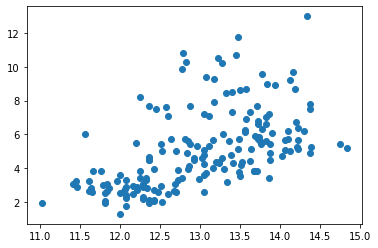

In [ ]:
plt.scatter(df1['Alcohol'], df1['Color_Intensity'])
plt.show()

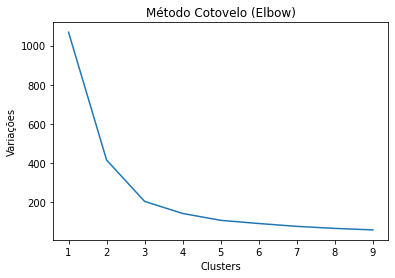

In [ ]:
variacoes = []
for i in range(1,10):
    kmeans=KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(x)
    variacoes.append(kmeans.inertia_)

plt.plot(range(1,10), variacoes)
plt.title('Método Cotovelo (Elbow)')
plt.xlabel('Clusters')
plt.ylabel('Variações')
plt.show()

In [ ]:
kmeans_final = KMeans(n_clusters=3)

In [ ]:
kmeans_final.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
cluster_pred = kmeans_final.predict(x)

In [ ]:
cluster_centers = kmeans_final.cluster_centers_

In [ ]:
cluster_centers

array([[13.45168831,  5.19441558],
       [12.25353846,  2.854     ],
       [13.38472222,  8.74611108]])

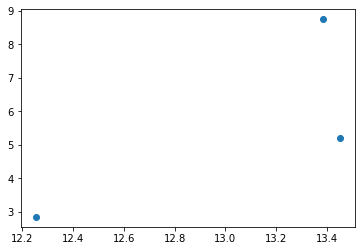

In [ ]:
plt.scatter(cluster_centers[:,0], cluster_centers[:,1])

In [ ]:
x[cluster_pred==3, 0]

array([], dtype=float64)

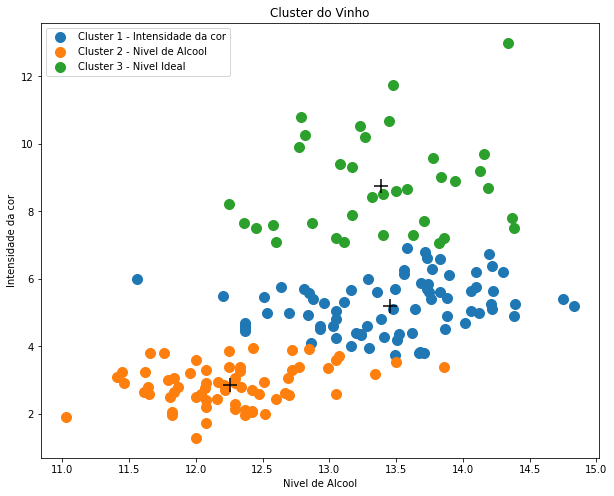

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x[cluster_pred==0, 0], x[cluster_pred==0, 1],s=100, label='Cluster 1 - Intensidade da cor')
plt.scatter(x[cluster_pred==1, 0], x[cluster_pred==1, 1],s=100, label='Cluster 2 - Nivel de Alcool')
plt.scatter(x[cluster_pred==2, 0], x[cluster_pred==2, 1],s=100, label='Cluster 3 - Nivel Ideal')
plt.scatter(cluster_centers[:,0],cluster_centers[:,1], marker='+', s=200, c='black')
plt.legend()
plt.title('Cluster do Vinho')
plt.xlabel('Nivel de Alcool')
plt.ylabel('Intensidade da cor')
plt.show()